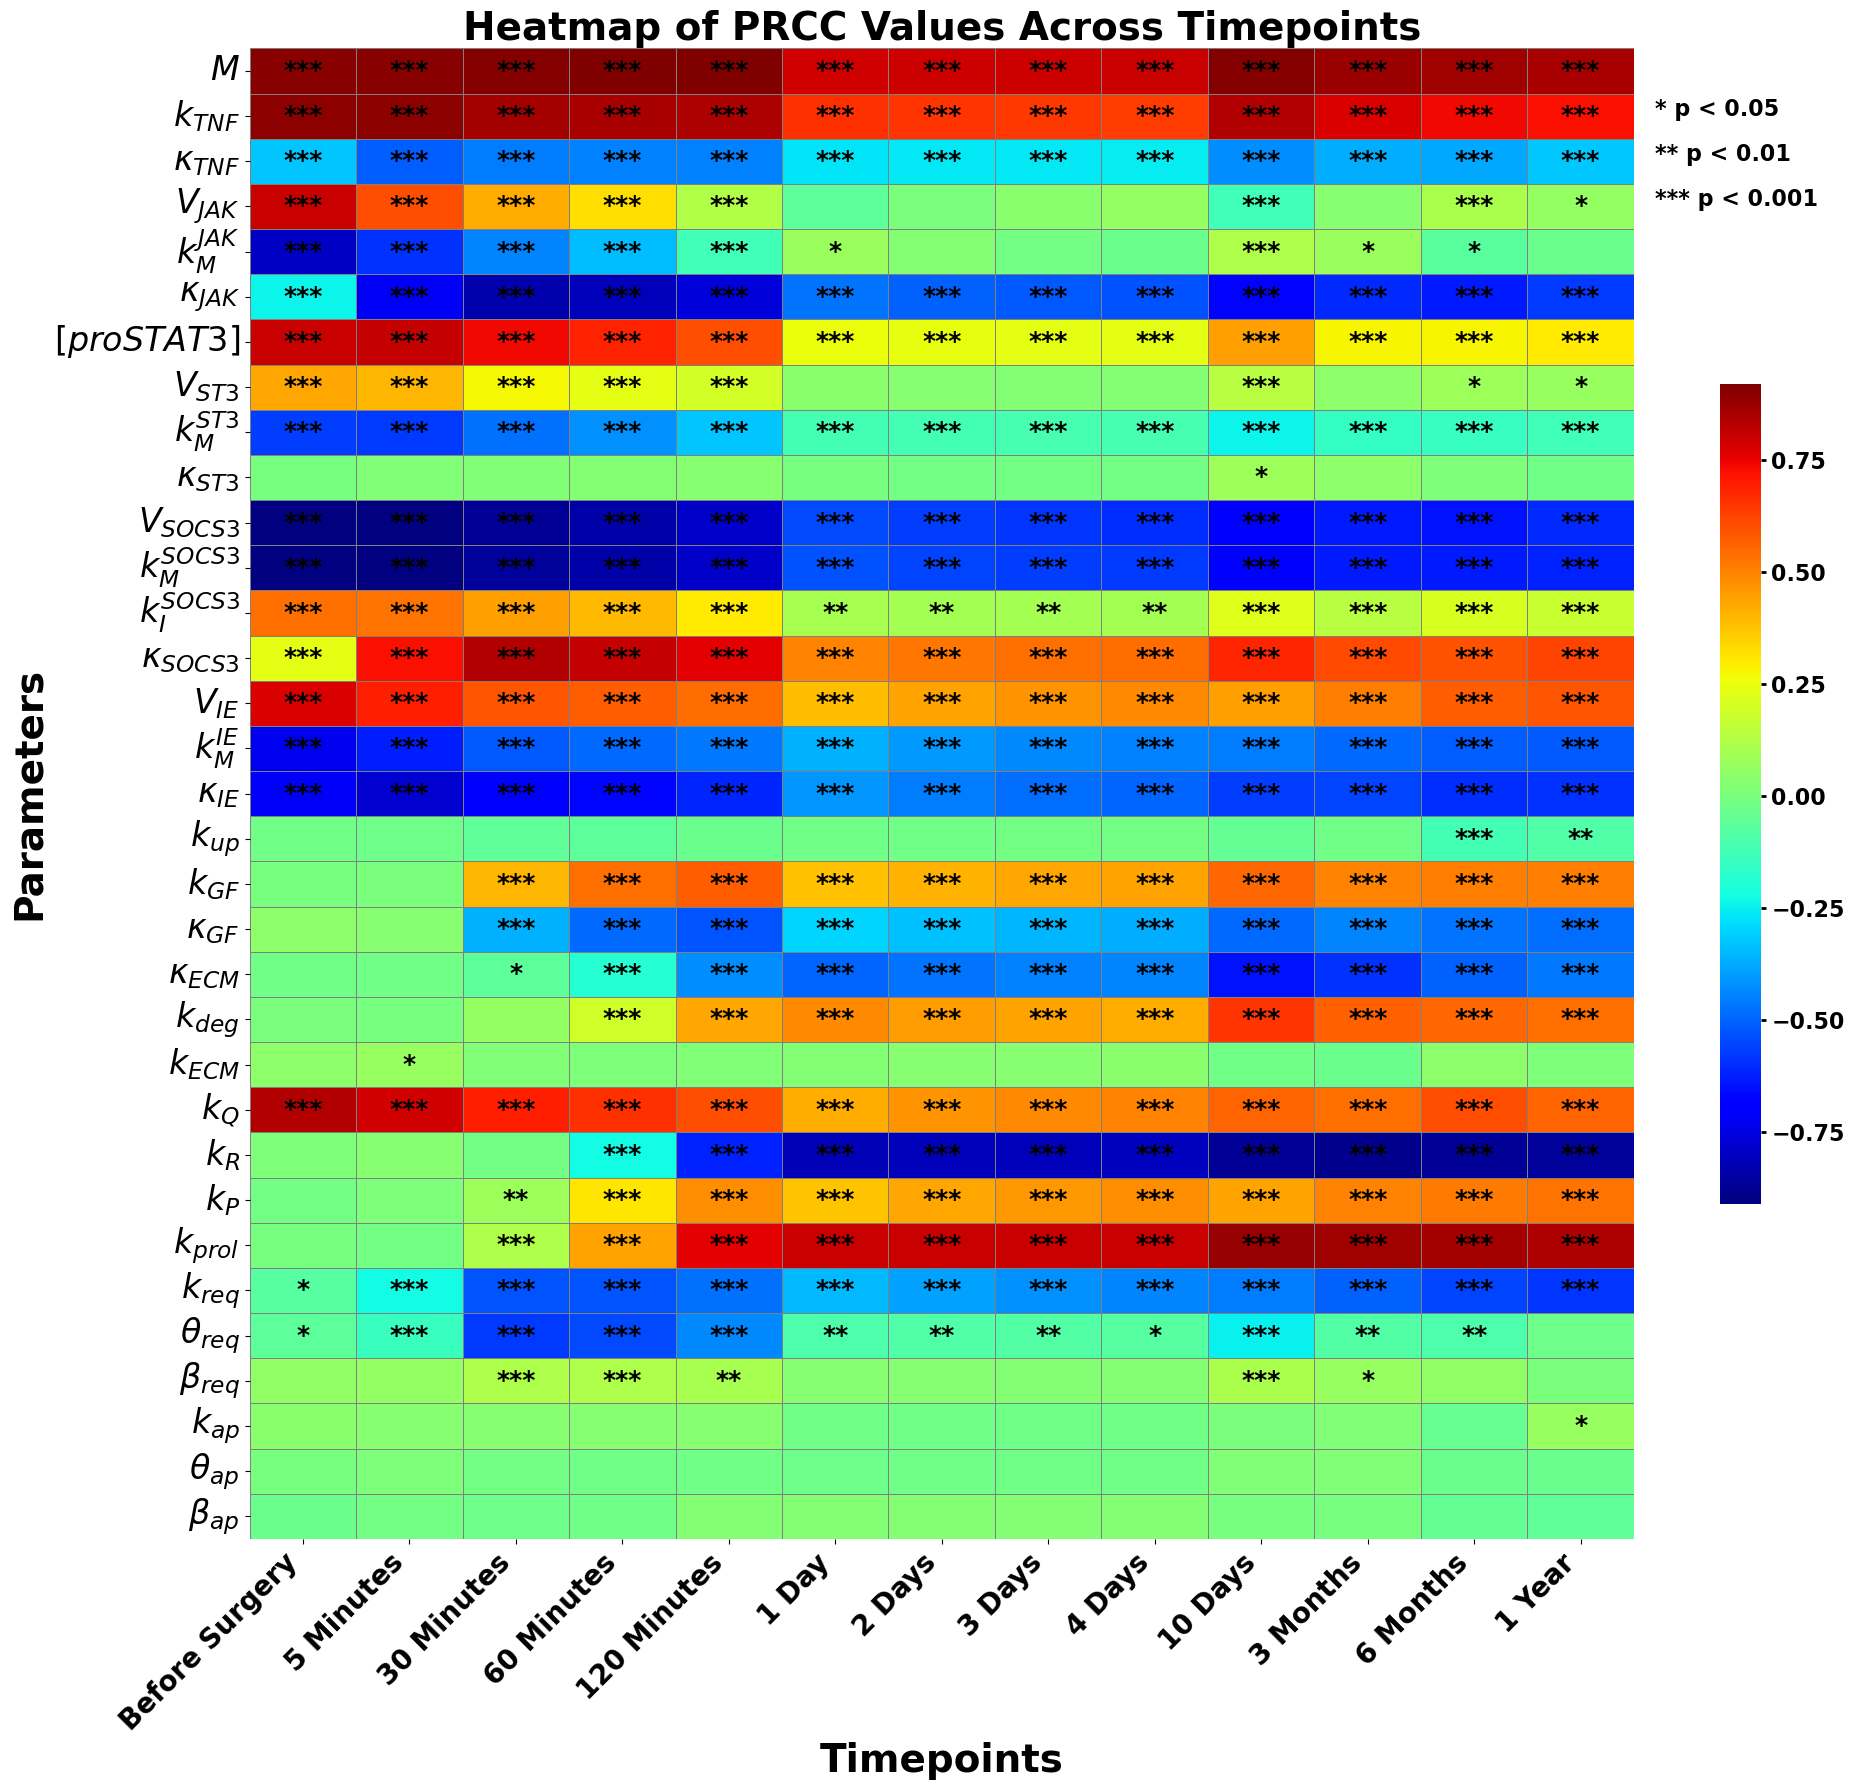

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

# Load .mat data
prcc_vals_data = loadmat('prcc_vals_all.mat')
prcc_pvals_data = loadmat('prcc_pvals_all.mat')

# Extract arrays from loaded dicts (adjust variable names if needed)
prcc_vals_all = prcc_vals_data['prcc_vals_all']
prcc_pvals_all = prcc_pvals_data['prcc_pvals_all']

# Define timepoints and parameter names
timepoint_names = ['Before Surgery', '5 Minutes', '30 Minutes', '60 Minutes',
                   '120 Minutes', '1 Day', '2 Days', '3 Days',
                   '4 Days', '10 Days', '3 Months', '6 Months', '1 Year']

param_names_latex = [r'$M$', r'$k_{TNF}$', r'$\kappa_{TNF}$', r'$V_{JAK}$', r'$k_{M}^{JAK}$',
                     r'$\kappa_{JAK}$', r'$[proSTAT3]$', r'$V_{ST3}$', r'$k_M^{ST3}$', r'$\kappa_{ST3}$',
                     r'$V_{SOCS3}$', r'$k_M^{SOCS3}$', r'$k_I^{SOCS3}$', r'$\kappa_{SOCS3}$', r'$V_{IE}$',
                     r'$k_M^{IE}$', r'$\kappa_{IE}$', r'$k_{up}$', r'$k_{GF}$', r'$\kappa_{GF}$',
                     r'$\kappa_{ECM}$', r'$k_{deg}$', r'$k_{ECM}$', r'$k_Q$', r'$k_R$',
                     r'$k_P$', r'$k_{prol}$', r'$k_{req}$', r'$\theta_{req}$', r'$\beta_{req}$',
                     r'$k_{ap}$', r'$\theta_{ap}$', r'$\beta_{ap}$']

# Plot heatmap
plt.figure(figsize=(20, 18))
ax = sns.heatmap(prcc_vals_all, cmap='jet', cbar=True, xticklabels=timepoint_names,
                 yticklabels=param_names_latex, linewidths=0.5, linecolor='gray',
                 cbar_kws={'shrink': 0.55})  # shrink makes the colorbar thinner vertically

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # font size
cbar.ax.yaxis.set_tick_params(width=2)  # tick width
for l in cbar.ax.get_yticklabels():
    l.set_weight("bold")


# Overlay significance stars
for i in range(prcc_pvals_all.shape[0]):
    for j in range(prcc_pvals_all.shape[1]):
        pval = prcc_pvals_all[i, j]
        if pval < 0.001:
            sig = '***'
        elif pval < 0.01:
            sig = '**'
        elif pval < 0.05:
            sig = '*'
        else:
            sig = ''
        if sig:
            ax.text(j + 0.5, i + 0.5, sig, ha='center', va='center', fontsize=18, fontweight='bold', color='black')

# Customize axes
ax.set_xticklabels(timepoint_names, rotation=45, ha='right', fontsize=20, fontweight='bold')
ax.set_yticklabels(param_names_latex, rotation=0, fontsize=24, fontweight='bold')
ax.set_xlabel('Timepoints', fontsize=28, fontweight='bold')
ax.set_ylabel('Parameters', fontsize=28, fontweight='bold')
plt.title('Heatmap of PRCC Values Across Timepoints', fontsize=28, fontweight='bold')

# Significance legend
plt.text(13.2, 1.5, '* p < 0.05', fontsize=16, fontweight='bold', color='black')
plt.text(13.2, 2.5, '** p < 0.01', fontsize=16, fontweight='bold', color='black')
plt.text(13.2, 3.5, '*** p < 0.001', fontsize=16, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig("PRCC_heatmap.png", dpi=600)
plt.show()
